# COVID Data Visualization for 5 regions

In [1]:
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from custuntions import phase_mask, line_plot, scatter_plot

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
dfs = {}

In [3]:
for file in os.listdir("./DATA"):
    filename = file.split(".")
    dfs[f"{filename[0]}"] = pd.read_csv(f"./DATA/{file}")

In [4]:
for city in dfs:
    dfs[city]["Date"] = pd.to_datetime(dfs[city]["YEAR"].astype(str) + "/" + dfs[city]["MO"].astype(str) + "/" + dfs[city]["DY"].astype(str))
    dfs[city].set_index('Date', inplace=True)
    dfs[city].drop(["LAT", "LON", "YEAR", "MO", "DY"], axis=1, inplace=True)

In [5]:
df_cases = pd.read_csv("US_state_cases.csv")

In [6]:
df_cases

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
28004,2021-07-24,Virginia,51,688300,11500
28005,2021-07-24,Washington,53,467489,6124
28006,2021-07-24,West Virginia,54,165702,2936
28007,2021-07-24,Wisconsin,55,682276,8240


In [7]:
df_cases['date'] = pd.to_datetime(df_cases['date'])
df_cases.rename(columns={'date':'Date'}, inplace=True)
df_cases.set_index('Date', inplace= True)
df_cases.drop(['fips'], axis=1, inplace=True)
df_cases = df_cases.loc["2020-03-01":"2021-03-16"]

In [8]:
for city in dfs:
    dfs[city] = pd.merge(left=dfs[city],
                         left_index=True,
                         right=df_cases.loc[(df_cases['state'] == city), ['cases', 'deaths']],
                         right_index=True,
                         how='inner')

In [9]:
dfs_southern = [dfs['Arizona'], dfs['Louisiana'], dfs['Texas'], dfs['Florida']]

In [10]:
dfs_northern = [dfs['Minnesota'], dfs['Massachusetts']]

In [11]:
dfs_western = [dfs['Nevada'], dfs['California'], dfs['Oregon']]

In [12]:
dfs_eastern = [dfs['New York'], dfs['New Jersey']]

In [13]:
dfs['Nevada']

,RH2M,T2M_RANGE,WS10M_RANGE,WS50M_RANGE,T2M_MIN,T2M_MAX,T2MDEW,cases,deaths
Date,,,,,,,,,
2020-03-05,31.99,14.84,3.90,4.15,3.67,18.52,-6.46,2,0
2020-03-06,39.13,13.20,4.92,5.68,3.34,16.54,-4.75,2,0
2020-03-07,44.88,11.00,8.66,8.03,1.86,12.85,-4.39,2,0
2020-03-08,45.88,14.30,6.34,8.19,-1.00,13.30,-5.34,4,0
2020-03-09,44.97,12.05,4.87,4.87,0.00,12.05,-5.88,4,0
...,...,...,...,...,...,...,...,...,...
2021-03-12,59.56,7.84,4.88,5.28,-5.57,2.27,-8.30,298706,5099
2021-03-13,41.22,12.81,6.39,6.40,-5.41,7.40,-12.06,299142,5119
2021-03-14,33.68,17.96,3.94,5.75,-4.10,13.86,-10.21,299318,5119


In [14]:
df_southern_mean = pd.concat(dfs_southern).groupby("Date").mean()
df_northern_mean = pd.concat(dfs_northern).groupby("Date").mean()
df_eastern_mean = pd.concat(dfs_eastern).groupby("Date").mean()
df_western_mean = pd.concat(dfs_western).groupby("Date").mean()

In [15]:
columns = {'RH2M':'Relative Humidity at 2 Meters (%)',
           'T2MDEW': 'Dew/Frost Point at 2 Meters (C)',
           'T2M_MAX': 'Maximum Temperature at 2 Meters (C)',
           'T2M_MIN' :'Minimum Temperature at 2 Meters (C)',
           'T2M_RANGE': 'Temperature Range at 2 Meters (C)',
           'WS50M_RANGE': 'Wind Speed Range at 50 Meters (m/s)',
           'WS10M_RANGE': 'Wind Speed Range at 10 Meters (m/s)'
}

## Southern Region

In [16]:
df_southern_mean.rename(columns=columns, inplace=True)

In [17]:
df_southern_mean

,Relative Humidity at 2 Meters (%),Temperature Range at 2 Meters (C),Wind Speed Range at 10 Meters (m/s),Wind Speed Range at 50 Meters (m/s),Minimum Temperature at 2 Meters (C),Maximum Temperature at 2 Meters (C),Dew/Frost Point at 2 Meters (C),cases,deaths
Date,,,,,,,,,
2020-03-01,60.320000,14.310000,3.736667,4.693333,8.490000,22.800000,7.190000,4.666667e+00,0.00
2020-03-02,65.613333,12.176667,3.953333,4.163333,11.496667,23.673333,10.573333,4.666667e+00,0.00
2020-03-03,64.023333,12.703333,3.983333,6.086667,12.543333,25.243333,10.930000,5.333333e+00,0.00
2020-03-04,68.633333,14.370000,3.803333,5.390000,10.896667,25.266667,12.243333,5.666667e+00,0.00
2020-03-05,55.920000,15.516667,5.246667,7.726667,11.823333,27.336667,9.803333,7.333333e+00,0.00
...,...,...,...,...,...,...,...,...,...
2021-03-12,67.605000,11.027500,2.500000,2.750000,13.375000,24.402500,11.927500,1.488689e+06,26228.75
2021-03-13,69.805000,10.190000,3.647500,5.055000,13.190000,23.385000,11.935000,1.490777e+06,26290.75
2021-03-14,62.410000,14.622500,4.180000,5.597500,10.057500,24.682500,9.530000,1.492770e+06,26319.75


In [18]:
# phase one and phase 2 seperation here
phase1_southern_mean, phase2_southern_mean = phase_mask(df_southern_mean, "2020-03-01", "2020-10-01", "2020-10-01", "2021-03-16")

In [19]:
# dropping columns here (Drop cases and deaths to better visualize the atmospheric data)
# phase1_southern_mean = phase1_southern_mean.drop(["cases", "deaths"], axis=1)
# phase2_southern_mean = phase2_southern_mean.drop(["cases", "deaths"], axis=1)

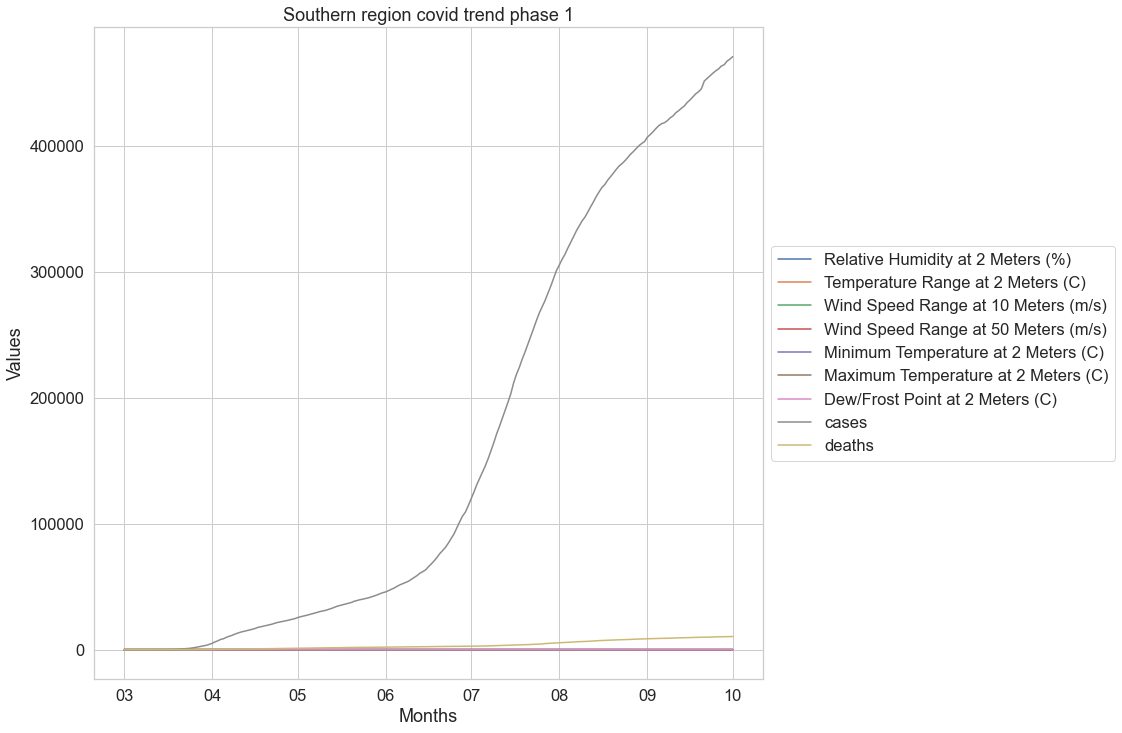

In [20]:
fig, ax = line_plot(phase1_southern_mean, "Southern region covid trend phase 1")

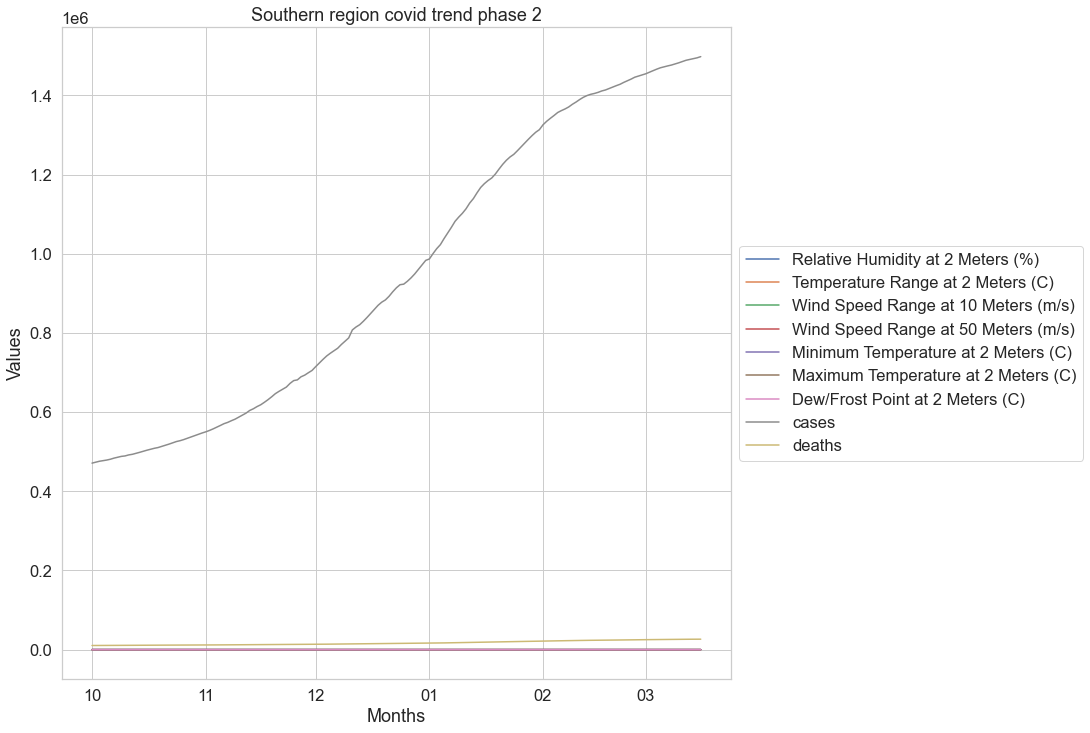

In [21]:
fig, ax = line_plot(phase2_southern_mean, "Southern region covid trend phase 2")

<AxesSubplot:xlabel='cases', ylabel='Dew/Frost Point at 2 Meters (C)'>

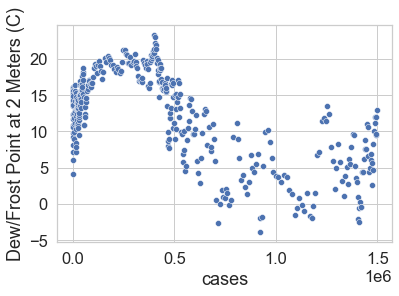

In [22]:
scatter_plot(df_southern_mean, "cases", columns["T2MDEW"])

<AxesSubplot:xlabel='cases', ylabel='Maximum Temperature at 2 Meters (C)'>

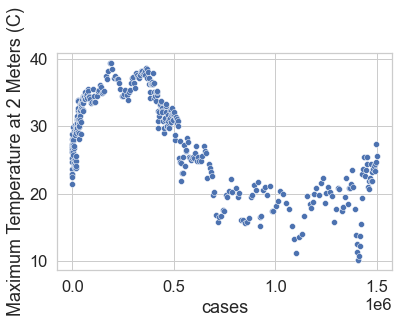

In [23]:
scatter_plot(df_southern_mean, "cases", columns["T2M_MAX"]) 

<AxesSubplot:xlabel='cases', ylabel='Minimum Temperature at 2 Meters (C)'>

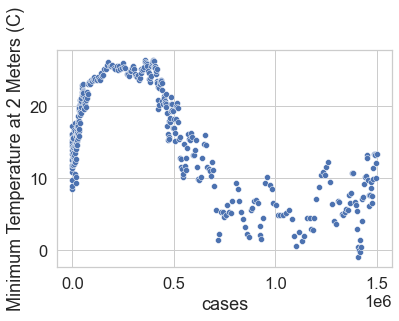

In [24]:
scatter_plot(df_southern_mean, "cases", columns["T2M_MIN"])

<AxesSubplot:xlabel='cases', ylabel='Wind Speed Range at 50 Meters (m/s)'>

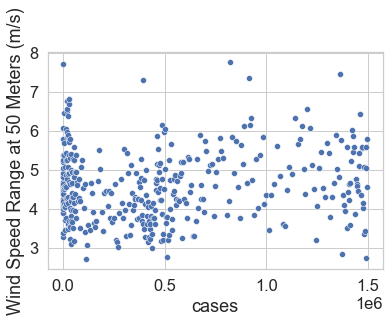

In [25]:
scatter_plot(df_southern_mean, "cases", columns["WS50M_RANGE"])

<AxesSubplot:xlabel='cases', ylabel='Wind Speed Range at 10 Meters (m/s)'>

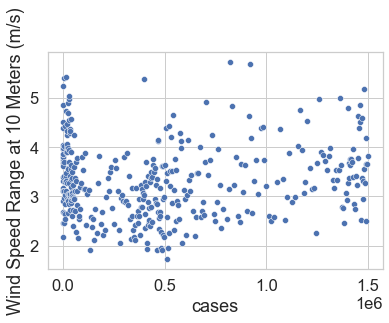

In [26]:
scatter_plot(df_southern_mean, "cases", columns["WS10M_RANGE"])

## Nothern Region

In [27]:
df_northern_mean.rename(columns=columns, inplace=True)

In [28]:
df_northern_mean

,Relative Humidity at 2 Meters (%),Temperature Range at 2 Meters (C),Wind Speed Range at 10 Meters (m/s),Wind Speed Range at 50 Meters (m/s),Minimum Temperature at 2 Meters (C),Maximum Temperature at 2 Meters (C),Dew/Frost Point at 2 Meters (C),cases,deaths
Date,,,,,,,,,
2020-03-01,68.970,9.600,2.510,4.340,-10.140,-0.540,-10.510,1.0,0.0
2020-03-02,87.530,15.050,4.330,7.540,-6.010,9.040,-0.370,2.0,0.0
2020-03-03,89.110,11.780,2.780,5.710,2.860,14.640,5.840,2.0,0.0
2020-03-04,79.020,7.040,3.960,5.070,0.730,7.760,1.270,2.0,0.0
2020-03-05,72.910,9.820,2.420,4.220,-1.340,8.480,-1.710,3.0,0.0
...,...,...,...,...,...,...,...,...,...
2021-03-12,71.290,10.735,3.715,6.465,-3.445,7.295,-2.630,547067.5,11692.5
2021-03-13,65.125,12.410,4.015,6.025,-3.450,8.960,-4.080,548539.5,11711.5
2021-03-14,64.570,10.755,4.800,5.075,-5.745,5.010,-6.335,549884.0,11729.5


In [29]:
# phase one and phase 2 seperation here
phase1_northern_mean, phase2_northern_mean = phase_mask(df_northern_mean, "2020-03-01", "2020-10-01", "2020-10-01", "2021-03-16")

In [30]:
# dropping columns here
# phase1_northern_mean = phase1_northern_mean.drop(["cases", "deaths"], axis=1)
# phase2_northern_mean = phase2_northern_mean.drop(["cases", "deaths"], axis=1)

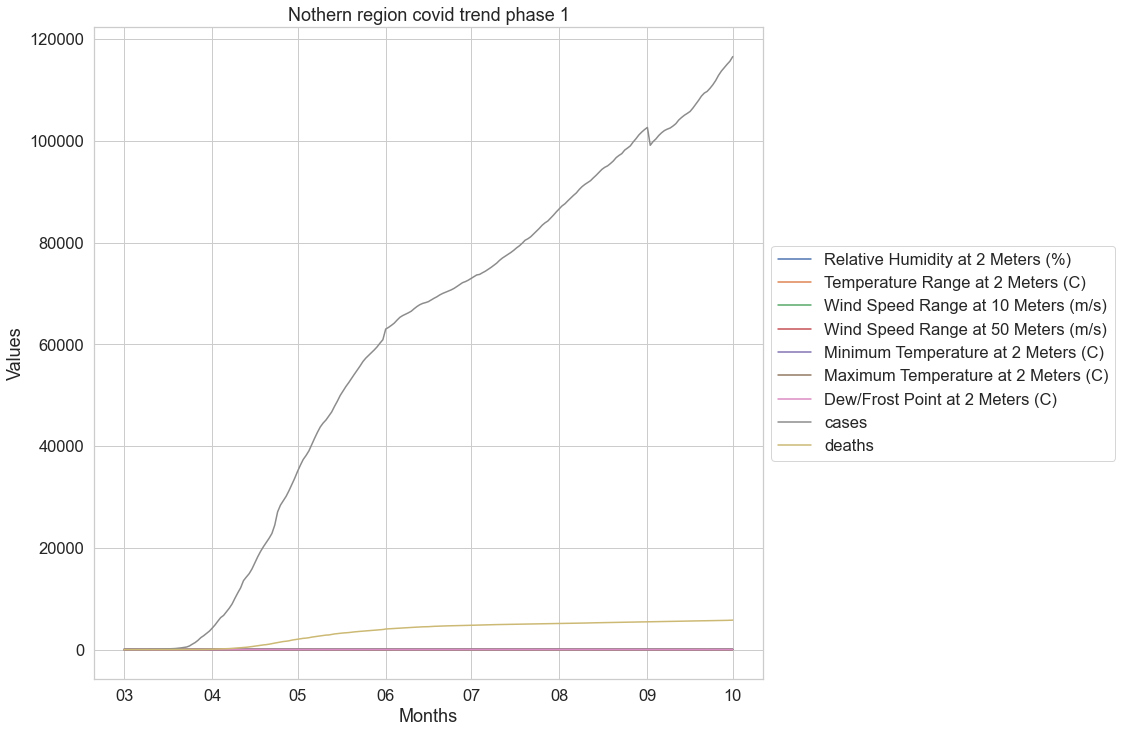

In [31]:
fig, ax = line_plot(phase1_northern_mean, "Nothern region covid trend phase 1")

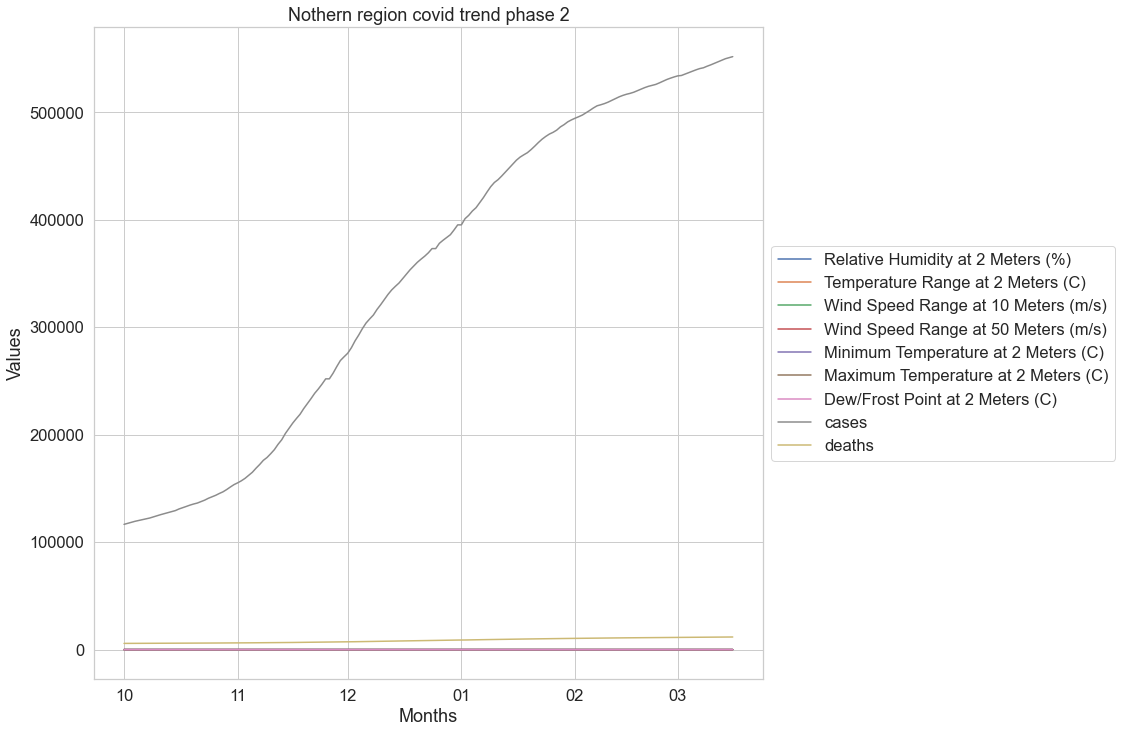

In [32]:
fig, ax = line_plot(phase2_northern_mean, "Nothern region covid trend phase 2")

<AxesSubplot:xlabel='cases', ylabel='Dew/Frost Point at 2 Meters (C)'>

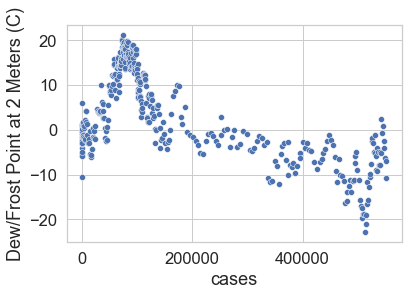

In [33]:
scatter_plot(df_northern_mean, "cases", columns["T2MDEW"])

<AxesSubplot:xlabel='cases', ylabel='Maximum Temperature at 2 Meters (C)'>

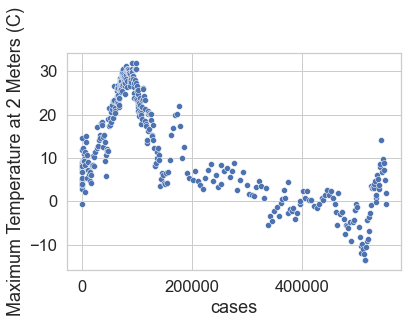

In [34]:
scatter_plot(df_northern_mean, "cases", columns["T2M_MAX"]) 

<AxesSubplot:xlabel='cases', ylabel='Minimum Temperature at 2 Meters (C)'>

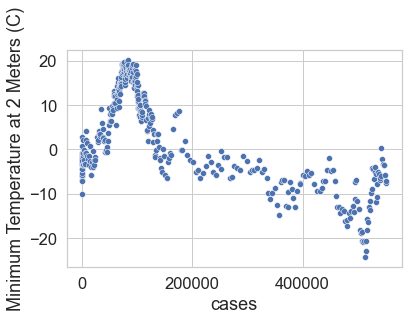

In [35]:
scatter_plot(df_northern_mean, "cases", columns["T2M_MIN"])

<AxesSubplot:xlabel='cases', ylabel='Wind Speed Range at 50 Meters (m/s)'>

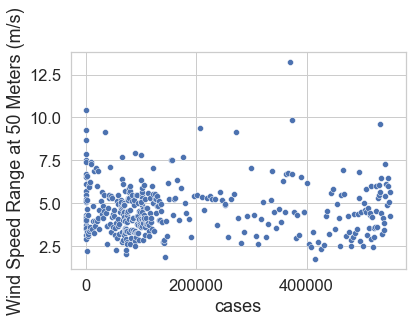

In [36]:
scatter_plot(df_northern_mean, "cases", columns["WS50M_RANGE"])

<AxesSubplot:xlabel='cases', ylabel='Wind Speed Range at 10 Meters (m/s)'>

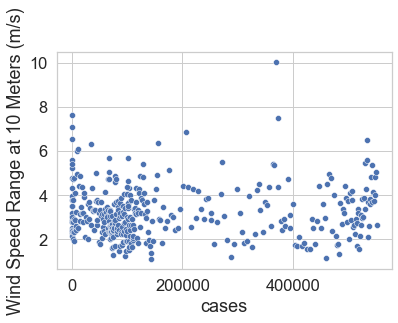

In [37]:
scatter_plot(df_northern_mean, "cases", columns["WS10M_RANGE"])

## Eastern Region

In [38]:
df_eastern_mean.rename(columns=columns, inplace=True)

In [39]:
df_eastern_mean

,Relative Humidity at 2 Meters (%),Temperature Range at 2 Meters (C),Wind Speed Range at 10 Meters (m/s),Wind Speed Range at 50 Meters (m/s),Minimum Temperature at 2 Meters (C),Maximum Temperature at 2 Meters (C),Dew/Frost Point at 2 Meters (C),cases,deaths
Date,,,,,,,,,
2020-03-01,71.840,10.170,2.860,3.670,-5.630,4.540,-5.410,1.0,0.0
2020-03-02,87.110,12.780,3.570,5.910,-0.950,11.830,3.490,1.0,0.0
2020-03-03,91.800,8.920,4.890,8.690,4.880,13.790,7.660,2.0,0.0
2020-03-04,74.855,7.345,3.975,4.085,3.450,10.795,2.580,6.0,0.0
2020-03-05,70.600,11.890,2.650,5.505,-1.800,10.095,-0.680,12.0,0.0
...,...,...,...,...,...,...,...,...,...
2021-03-12,75.160,9.830,3.375,6.490,5.835,15.665,6.760,1279873.5,36065.5
2021-03-13,64.880,10.595,4.325,7.700,-3.205,7.385,-4.115,1284823.5,36129.0
2021-03-14,67.035,12.440,4.650,7.750,-3.665,8.775,-3.225,1289822.0,36189.0


In [40]:
# phase one and phase 2 seperation here
phase1_eastern_mean, phase2_eastern_mean = phase_mask(df_eastern_mean, "2020-03-01", "2020-10-01", "2020-10-01", "2021-03-16")

In [41]:
# dropping columns here (Drop cases and deaths to better visualize the atmospheric data)
# phase1_eastern_mean = phase1_eastern_mean.drop(["cases", "deaths"], axis=1)
# phase2_eastern_mean = phase2_eastern_mean.drop(["cases", "deaths"], axis=1)

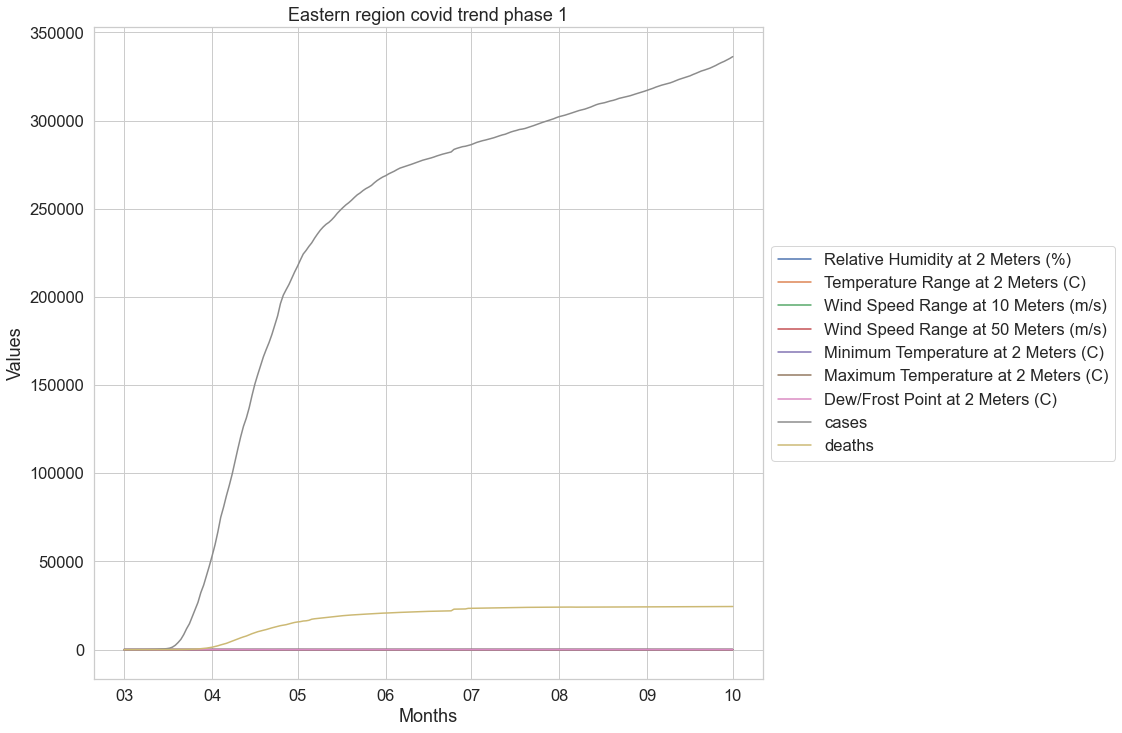

In [42]:
fig, ax = line_plot(phase1_eastern_mean, "Eastern region covid trend phase 1")

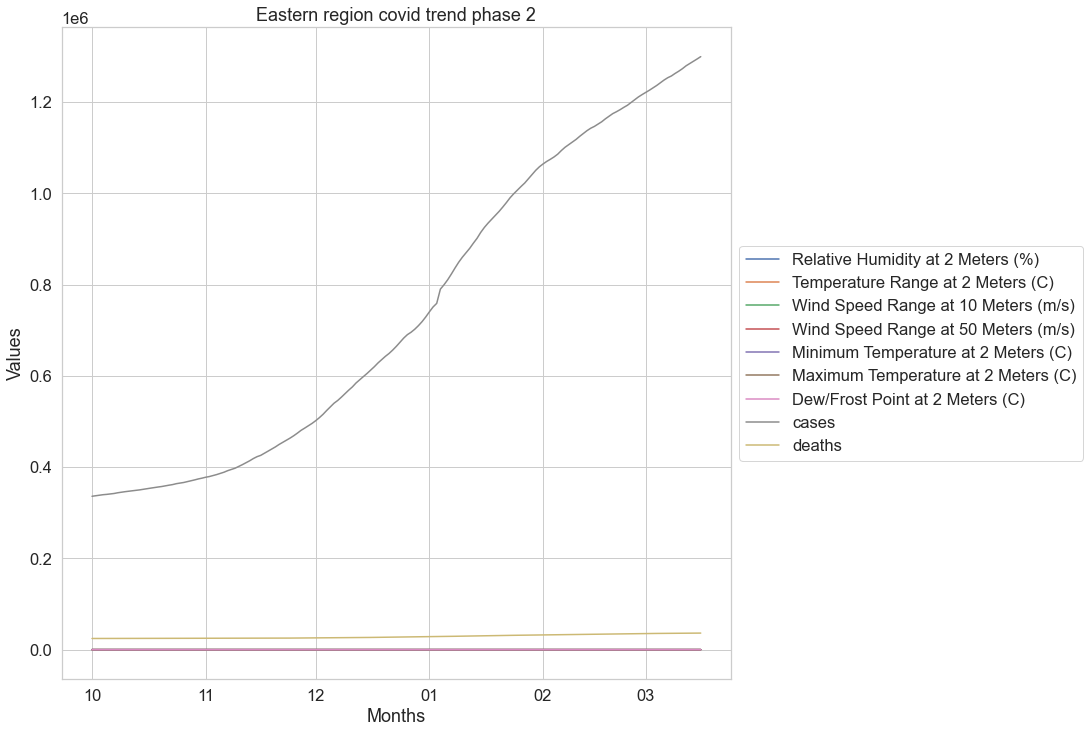

In [43]:
fig, ax = line_plot(phase2_eastern_mean, "Eastern region covid trend phase 2")

<AxesSubplot:xlabel='cases', ylabel='Dew/Frost Point at 2 Meters (C)'>

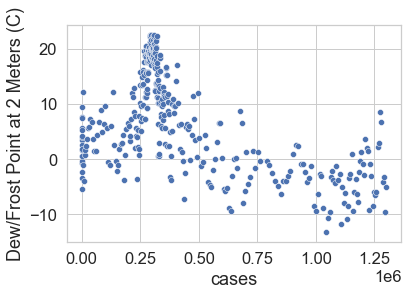

In [44]:
scatter_plot(df_eastern_mean, "cases", columns["T2MDEW"])

<AxesSubplot:xlabel='cases', ylabel='Maximum Temperature at 2 Meters (C)'>

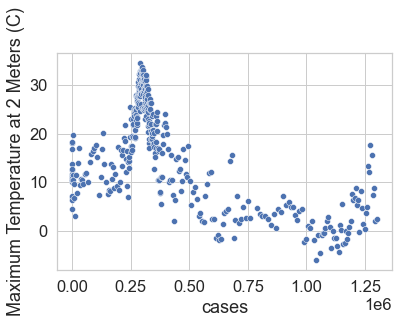

In [45]:
scatter_plot(df_eastern_mean, "cases", columns["T2M_MAX"]) 

<AxesSubplot:xlabel='cases', ylabel='Minimum Temperature at 2 Meters (C)'>

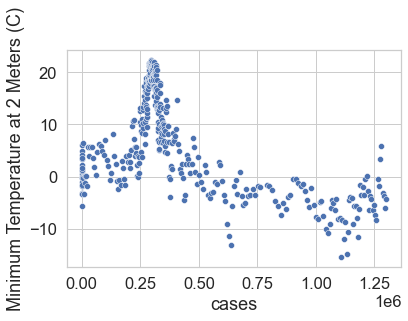

In [46]:
scatter_plot(df_eastern_mean, "cases", columns["T2M_MIN"])

<AxesSubplot:xlabel='cases', ylabel='Wind Speed Range at 50 Meters (m/s)'>

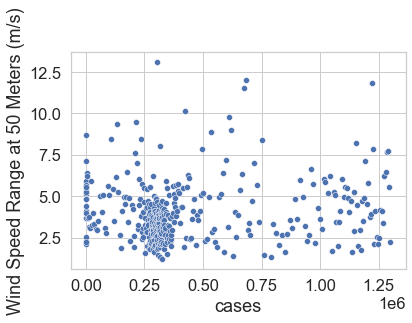

In [47]:
scatter_plot(df_eastern_mean, "cases", columns["WS50M_RANGE"])

<AxesSubplot:xlabel='cases', ylabel='Wind Speed Range at 10 Meters (m/s)'>

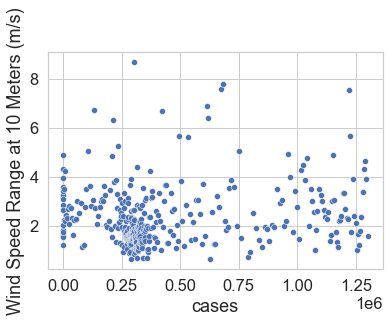

In [48]:
scatter_plot(df_eastern_mean, "cases", columns["WS10M_RANGE"])

## Western Region

In [49]:
df_western_mean.rename(columns=columns, inplace=True)

In [50]:
df_western_mean

,Relative Humidity at 2 Meters (%),Temperature Range at 2 Meters (C),Wind Speed Range at 10 Meters (m/s),Wind Speed Range at 50 Meters (m/s),Minimum Temperature at 2 Meters (C),Maximum Temperature at 2 Meters (C),Dew/Frost Point at 2 Meters (C),cases,deaths
Date,,,,,,,,,
2020-03-01,70.600000,8.415000,4.095000,3.900000,0.495000,8.910000,-0.780000,1.750000e+01,0.000000
2020-03-02,66.455000,10.840000,4.825000,4.535000,0.720000,11.565000,-0.765000,2.000000e+01,0.000000
2020-03-03,54.870000,14.970000,4.670000,6.285000,3.315000,18.280000,0.370000,2.350000e+01,0.000000
2020-03-04,60.035000,12.895000,3.110000,4.300000,3.865000,16.765000,1.860000,2.850000e+01,0.500000
2020-03-05,45.876667,15.246667,4.046667,4.816667,4.413333,19.663333,-0.650000,2.366667e+01,0.333333
...,...,...,...,...,...,...,...,...,...
2021-03-12,55.926667,10.636667,2.716667,3.340000,-2.103333,8.530000,-5.080000,1.358438e+06,20921.000000
2021-03-13,47.976667,14.716667,3.980000,4.456667,-1.496667,13.216667,-5.506667,1.359929e+06,21273.666667
2021-03-14,60.936667,13.283333,4.723333,5.716667,-0.180000,13.096667,-2.113333,1.360800e+06,21323.666667


In [51]:
# phase one and phase 2 seperation here
phase1_western_mean, phase2_western_mean = phase_mask(df_western_mean, "2020-03-01", "2020-10-01", "2020-10-01", "2021-03-16")

In [52]:
# dropping columns here
# phase1_western_mean = phase1_western_mean.drop(["cases", "deaths"], axis=1)
# phase2_western_mean = phase2_western_mean.drop(["cases", "deaths"], axis=1)

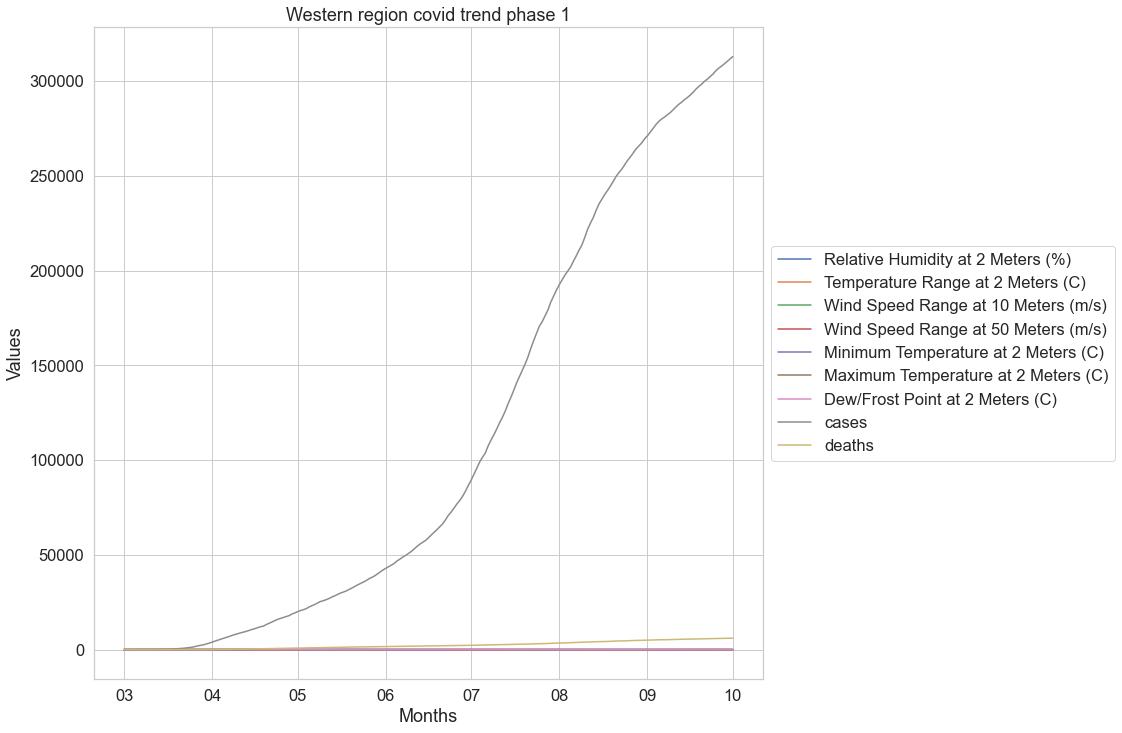

In [53]:
fig, ax = line_plot(phase1_western_mean, "Western region covid trend phase 1")

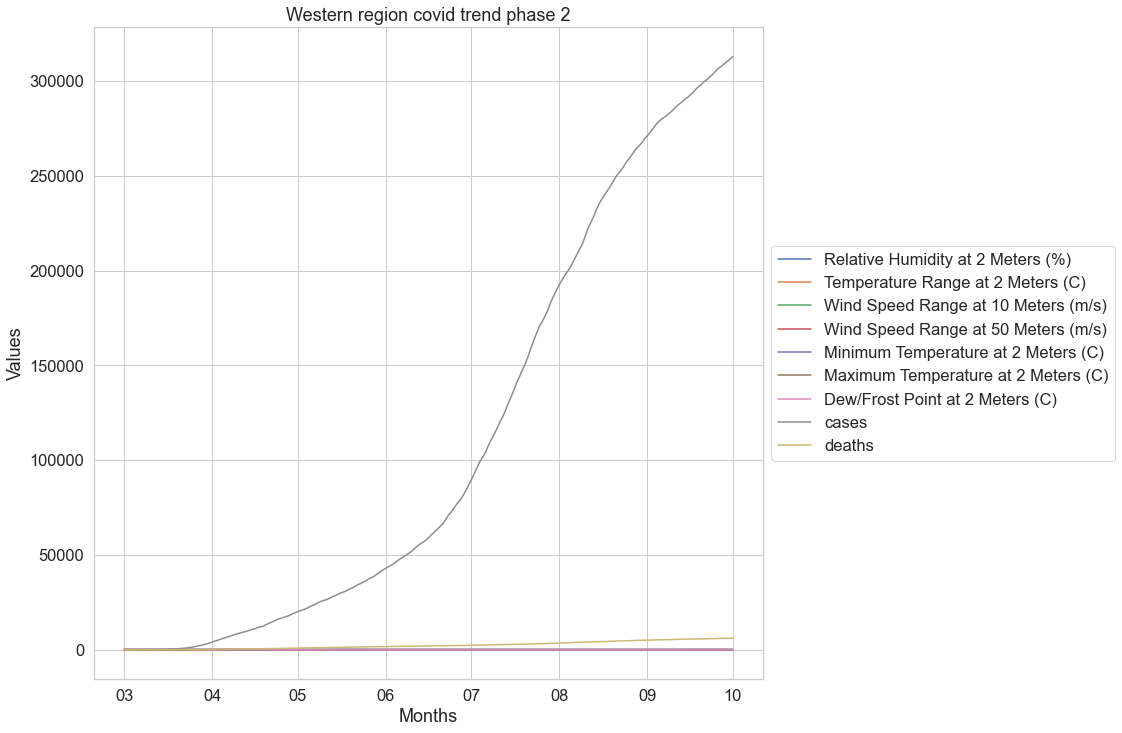

In [54]:
fig, ax = line_plot(phase1_western_mean, "Western region covid trend phase 2")

<AxesSubplot:xlabel='cases', ylabel='Relative Humidity at 2 Meters (%)'>

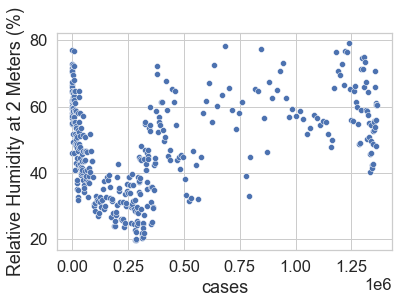

In [55]:
scatter_plot(df_western_mean, "cases", columns["RH2M"]) 

<AxesSubplot:xlabel='cases', ylabel='Dew/Frost Point at 2 Meters (C)'>

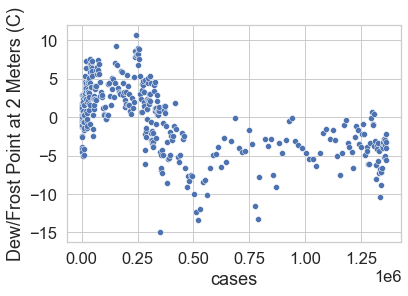

In [56]:
scatter_plot(df_western_mean, "cases", columns["T2MDEW"])

<AxesSubplot:xlabel='cases', ylabel='Maximum Temperature at 2 Meters (C)'>

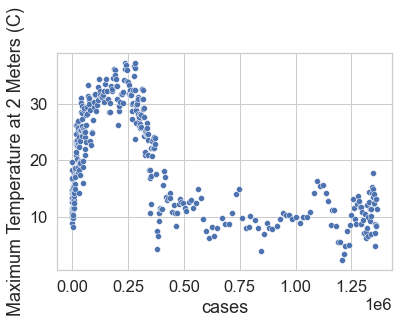

In [57]:
scatter_plot(df_western_mean, "cases", columns["T2M_MAX"]) 

<AxesSubplot:xlabel='cases', ylabel='Minimum Temperature at 2 Meters (C)'>

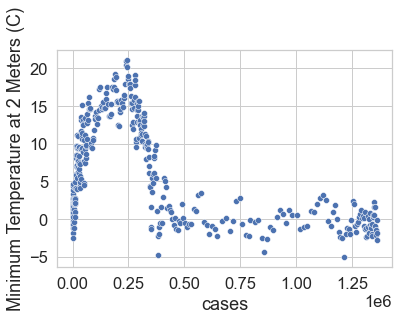

In [58]:
scatter_plot(df_western_mean, "cases", columns["T2M_MIN"])

<AxesSubplot:xlabel='cases', ylabel='Wind Speed Range at 50 Meters (m/s)'>

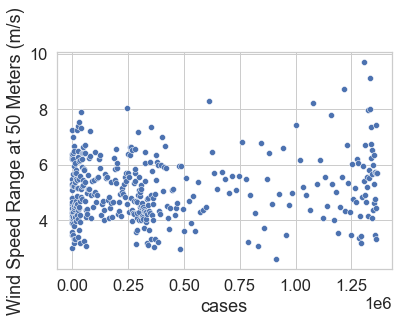

In [59]:
scatter_plot(df_western_mean, "cases", columns["WS50M_RANGE"])

<AxesSubplot:xlabel='cases', ylabel='Wind Speed Range at 10 Meters (m/s)'>

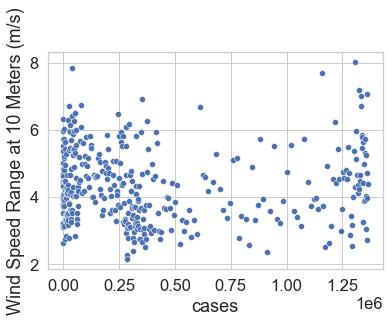

In [60]:
scatter_plot(df_western_mean, "cases", columns["WS10M_RANGE"])

## Converting region dataframes into excel files

In [ ]:
df_southern_mean.to_excel("Southern_weather_cases.xlsx") 
df_northern_mean.to_excel("northern_weather_cases.xlsx") 
df_eastern_mean.to_excel("eastern_weather_cases.xlsx") 
df_western_mean.to_excel("western_weather_cases.xlsx")